# TP1 - Simulation de variables aléatoires discrètes

In [1]:
import random 
random.seed()


## Exercice 0 : Calcul d'une valeur approchée de $\pi$

( https://www.mathcha.io/editor/4zPEVU4GfLpHx3dOB3hp4oP8YIrQnndWFmDJ6wx  )

In [2]:
import random

def PI(N):
    S=0
    for i in range(N):
        X=random.random()
        Y=random.random()
        if X**2+Y**2<1 :
            S=S+1
    return 4*S/N


In [3]:
# Test du programme : 10 estimations, chacune faite à partir d'un tirage de N points
N=10000
for i in range(10):
    print(PI(N))
    

3.1156
3.1292
3.1296
3.1344
3.1196
3.1376
3.148
3.1464
3.1528
3.1576


## Simulation d'une variable aléatoire de Bernoulli

Simulons une variable de Bernoulli

**Idée** : la proba qu'une variable aléatoire uniforme sur [0,1] soit inférieur à p vaut p.

In [4]:
# génération observation d'une Bernoulli
# Version longue 
def ObsBernoulli(p):
    X=random.random()
    if X<p :
        U=1
    else:
        U=0
    return U


In [5]:
# génération d'une Bernoulli
# Version courte 
def ObsBernoulli(p):
    return int(random.random()<p)


In [6]:
# Simulation d'une variable de Bernoulli, c'est-à-dire de N observations indépendantes d'une Bernouilli
def Bernoulli(N,p):
    X=[]
    for i in range(N):
        X.append(ObsBernoulli(p))
    return X


In [7]:
# Un essai
Bernoulli(5,1/3)


[0, 1, 0, 0, 0]

Comment valider notre programme ? 

On peut calculer la moyenne empirique (pour $N$ grand) et la comparer à l'espérance d'une v.a. de Bernouli (à savoir $p$).

In [8]:
# Calcul de la moyenne empirique
N=100000
p=1/3
B=Bernoulli(N,p)
sum(B)/N

print("La moyenne empirique vaut",sum(B)/N)
print("L'espérance d'une v.a. de Bernoulli de paramètre ",p," vaut",p,".")


La moyenne empirique vaut 0.33207
L'espérance d'une v.a. de Bernoulli de paramètre  0.3333333333333333  vaut 0.3333333333333333 .


## Simulation d'une variable aléatoire binomiale 

Une variable binomiale de paramètres $(n,p)$ peut être vue comme la somme de $n$ variables aléatoires de Bernoulli, indépendantes et de paramètre $p$.

In [9]:
# génération d'une observation de la binomiale :
def ObsBinomiale(p,n):
    b=Bernoulli(n,p)
    B=sum(b)
    return B


In [10]:
# en version courte :
def ObsBinomiale(p,n):
    return sum(Bernoulli(n,p))


In [11]:
# Simulation d'une variable de binomiale, c'est-à-dire de N observations indépendantes d'une binomiale
def Binomiale(N,p,n):
    X=[]
    for k in range(N):
        X.append(ObsBinomiale(p,n))
    return X
        

In [12]:
# premier esssai
Binomiale(10,1/2,10)


[7, 5, 5, 3, 7, 4, 7, 5, 5, 5]

Commment valider notre programme ? 

On peut calculer la moyenne empirique (pour $N$ grand) et la comparer à l'espérance d'une v.a. de binomiale (à savoir $np$).


In [13]:
# Calcul de la moyenne empirique
N=100000
n=10
p=1/3
B=Binomiale(N,p,n)
M=0
for i in range(N):
    M=M+B[i]
M=M/N
print("La moyenne empirique vaut",M,".")
print("L'espérance d'une binomiale de paramètres",p,",",n,"vaut",n*p,".")


La moyenne empirique vaut 3.33304 .
L'espérance d'une binomiale de paramètres 0.3333333333333333 , 10 vaut 3.333333333333333 .


In [14]:
# Calcul de la moyenne empirique (en version courte)
N=100000
n=10
p=1/3
B=Binomiale(N,p,n)
print("La moyenne empirique vaut",sum(B)/N,".")
print("L'espérance d'une binomiale de paramètres",p,",",n,"vaut",n*p,".")


La moyenne empirique vaut 3.33432 .
L'espérance d'une binomiale de paramètres 0.3333333333333333 , 10 vaut 3.333333333333333 .


Cela constitue un premier indicateur. C'est cependant insuffisant. En effet si on calculait la moyenne empirique d'un programme qui, par exemple, renverrait $1$ fois sur $n+1$ chacune des valeurs de $\{0,....n\}$ (c'est-à-dire qui simulerait une v.a de loi uniforme sur $\{0,...,n\}$, on obtiendrait aussi une moyenne empirique proche de $np$.

On peut calculer la variance empirique (non corrigée dans le programme qui suit), c'est-à dire de 
$$\frac1n \sum_{i=1}^N (x_i-\bar{x})^2=\frac1n \left(\sum_{i=1}^N x_i^2\right)~~ -\bar{x}^2.$$

In [15]:
# Calcul de la variance empirique (je n'indique ici que la version courte)

N=100000
n=10
p=1/3

B=Binomiale(N,p,n)
M=sum(B)/N  #calcul de la moyenne empirique 
Vx2=[B[k]**2 for k in range(N)]  # on créer le vecteur des x_i^2
Sx2=sum(Vx2)/N         #calcul de la moyenne de ce vecteur
print("La variance empirique vaut",Sx2-M**2,".")
print("La variance d'une binomiale de paramètres",p,",",n,"vaut",n*p*(1-p),".")


La variance empirique vaut 2.2122587311000004 .
La variance d'une binomiale de paramètres 0.3333333333333333 , 10 vaut 2.2222222222222223 .


C'est un second indicateur, mais là encore, c'est insuffisant.

Nous allons comparer les fréquences empirices obtenues pour $k\in\{0,\ldots,n\}$ avec les probabilités théoriques d'obtenir chacun de ces résultats. 

On rappelle que, pour une variable aléatoire binomiale $X\sim\mathcal{B}(n,p)$, on a :
$$\mathbb{P}(X=k)=C^k_np^k(1-p)^{n-k},$$
où $C^k_n=\frac{n!}{k!(n-k)!}$.

In [16]:
from matplotlib import pyplot as plt  
import math


In [17]:
def C(n,k):
    return math.factorial(n)/(math.factorial(k)*math.factorial(n-k))


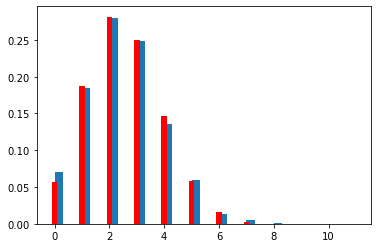

In [33]:
N=1000
n=10
p=1/4
X=Binomiale(N,p,n)
plt.hist(X, range = (0, n+1),width = 0.3,  bins = n+1,density=True)

PT=[]
for k in range(0,n+1):
        PT.append(C(n,k)*p**k*(1-p)**(n-k))
plt.bar(range(0,n+1),PT, width = 0.2, color = 'red') 
plt.show()


## Simulation d'une variable aléatoire géométrique

La loi géométrique de paramètre $p$ modélise la loi de première occurence de succès lors d'une succession d'épreuves de Bernoulli indépendantes de probabilité de succès $p$.

In [19]:
# génération observation d'une v.a. géométrique de paramètre p :
# Version longue
def ObsGeom(p):
    NbEssai=0
    loupe=True
    while(loupe):
        X=ObsBernoulli(p)
        NbEssai=NbEssai+1
        if X==1 :
            loupe=False
    return NbEssai


In [20]:
# génération d'une observation d'une v.a. géomtrique de paramètre p :
# version courte 
def ObsGeom(p):
    NbEssai=1 #attention ici on initialise à 1
    while(ObsBernoulli(p)==0):
        NbEssai+=1
    return NbEssai


In [21]:
# Simulation d'une variable géométrique, c'est à dire d'un échantillon d'observation
def Geom(N,p):
    X=[]
    for k in range(N):
        X.append(ObsGeom(p)) # ou ObsGeomL
    return X
        

In [22]:
#premier essai
print(Geom(10,0.5))


[1, 2, 1, 3, 1, 2, 1, 1, 1, 1]


Comment valider notre programme ? 

Là encore on peut regarder la moyenne empirique et vérifier qu'elle semble tendre vers l'espérance de la loi géométrique de paramètre $p$ (à savoir $\frac{1}p$) et calculer la variance empirqique et la comparer à l'espérance d'une telle loi ( à savoir $\frac{1-p}{p^2}$).

(reprenons le code que l'on a fait pour calculer la moyenne et la variance d'une loi binomiale et faisons-en des programmes génériques qui renvoient la moyenne et la variance d'un vecteur).

In [23]:
def moy(X):
    return sum(X)/len(X)

def var(X):
    N=len(X)
    M=moy(X) 
    Vx2=[X[k]**2 for k in range(N)]  
    Sx2=moy(Vx2)  
    return Sx2-M**2


In [24]:
N=10000
p=0.7
G=Geom(N,p)
print("La moyenne empirique vaut ",moy(G),". L'espérance vaut " ,1/p)
print("La variance empirique vaut ",var(G),". La variance (théorique) vaut " ,(1-p)/p**2)


La moyenne empirique vaut  1.4373 . L'espérance vaut  1.4285714285714286
La variance empirique vaut  0.60786871 . La variance (théorique) vaut  0.6122448979591838


Ceci est un permier indice mais ne suffit pas à valider le programme. Nous allons comparer là encore fréquences empiriques et probabilités d'obtenir telle ou telle valeur. On rappelle que pour une v.a. $X$ qui suit une loi géométrique de paramètre $p$, on a 
$$\mathbb{P}(X=k)=(1-p)^{k-1}p \qquad k\in \mathbb{N}^*.$$

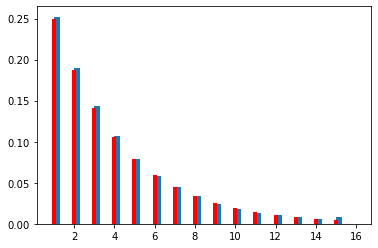

In [32]:
N=100000
p=1/4
kmax=15
X=Geom(N,p)
plt.hist(X, range = (1, kmax+1),bins=kmax,width = 0.3,density=True)

PT=[]
pr=p
for k in range(1,kmax+1):
        PT.append(pr)
        pr=pr*(1-p)
plt.bar(range(1,kmax+1),PT, width = 0.2, color = 'red') 
plt.show()


## Méthode par inversion

**Problèmatique :**

Soit une loi discrète dont le support est inclus dans $\mathbb{N}$. On cherche à simuler une v.a. qui suit cette loi.

**Princice :** 

On note $F$ la fonction de répartition de la loi que l'on cherche à simuler.

Soit $U$ une v.a uniforme sur $[0,1]$.

On note $X$ la v.a. qui vaut 
  * 0 si $U < F(0)$
  * 1 si $F(0)\leqslant U < F(1)$   
  * 2 si $F(1)\leqslant U < F(2)$
  * ...
 
C'est-à-dire que $X=k$ avec $k$ l'unique entier tel que $U\in [F(k-1) ; F(k)[$.

Ou, dit encore autrement, $X=\inf \{k, ~~U< F(k)\}$ (il n'est pas forcément utile de s'attarder sur cette expression pour l'instant)

On a
$$\begin{eqnarray}
            F_X(k)&=&\mathbb{P}(X\leqslant k)\\
                  &=&\mathbb{P}(U<F(k))\\
                  &=&F(k)\qquad\textrm{(car pour une variable aléatoire uniforme sur $[0,1]$ et pour $p\in[0,1]$, on a $\mathbb{P}(U<p)=p$)}. \\
  \end{eqnarray}
  $$
  
Ainsi la fonction de répartition de $X$ est celle de la loi voulue. Ainsi $X$ suit la loi voulue.

### Simulation d'une observation d'une loi de Poisson

In [26]:
import random 
random.seed()
import math
from matplotlib import pyplot as plt 


La loi de Poisson a pour fonction de masse
$$\mathbb{P}(X=k)=e^{-\lambda}\frac{\lambda^k}{k!}.$$

In [27]:
def Poisson(N,lam,arret):#N lam : paramètre, N : taille de l'échantillon
                        # arret :un nombre dans [0,1[ assez proche de 1 (voir le while)
    Fc=0
    F=[]
    k=0
    frac=1
    #Construction du vecteur fonction de répartition
    while (Fc<arret): # la support de la fonction de masse est N. On va s'arreter un peu avec +infini... 
        Fc=Fc+math.exp(-lam)*frac
        F.append(Fc)
        k=k+1             # on incrémente k pour la boucle 
        frac=frac*lam/k  #  a chaque fin de boucle on a frac qui vaut lambda^k/k! avec le k de la boucle suivante
        #Fc=Fc+exp(-lamba)*lambda^k/math.factorial(k)
    L=len(F)
    X=[]
    for i in range(N):
        S=random.random()
        k=0
        while((S>F[k])and(k<L-1)):
            k=k+1
        X.append(k)
    # print("les différences entres les \"jalons\", c'est-à-dire, le vecteur F(k+1)-F(k) où F est la fonction de réparition de la loi de Poisson est \n",[F[0]]+[F[k+1]-F[k] for k in range(L-1)],"\n")
    return X


Notons que pour les simulations précédentes nous avions fait un premier programme qui simulait la variable en appelant $N$ fois le programme précédent. 
Ce choix permettait, pour ces premiers exemples, de se concentrer sur le problème principale (simuler **une** observation).

Ici nous avons fait un choix différent. En effet la méthode la simulation par inversion de la fonction de répartition, nécessite de calculer la fonction de répartion. Il serait inutile de refaire ce calcul pour chacune des observations.

In [28]:
#Premier essai 
Poisson(20,2,0.9)


[0, 1, 4, 2, 1, 1, 4, 2, 2, 2, 4, 0, 1, 0, 4, 2, 0, 2, 4, 0]

Calculons la moyenne empirique et la variance empirique et comparons les avec l'espérance et la variance d'une loi de Poisson de paramètre $\lambda$ (toutes deux égales à $\lambda$).

In [29]:
N=10**6
l=0.7
P=Poisson(N,l,0.999)
print("La moyenne empirique vaut ",moy(P),". L'espérance vaut " ,l)
print("La variance empirique vaut ",var(P)," La variance (théorique) vaut " ,l)

La moyenne empirique vaut  0.699405 . L'espérance vaut  0.7
La variance empirique vaut  0.6935476459749998  La variance (théorique) vaut  0.7


Nous allons comparer là encore fréquences empiriques et probabilités d'obtenir telle ou telle valeur. On rappelle que pour une v.a. $X$ qui suit une loi de Poisson de paramètre $\lambda$, on a 
$$\mathbb{P}(X=k)=e^{-\lambda}\frac{\lambda^k}{k!}\qquad k\in \mathbb{N}^*.$$

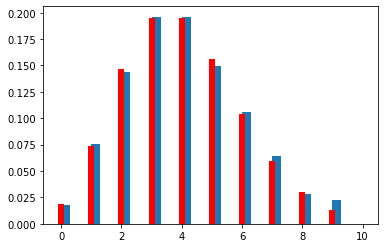

In [31]:
N=10**4
lam=4
arret=0.999
kmax=10
X=Poisson(N,lam,arret)
plt.hist(X, range = (0, kmax),width =0.3,density=True,align = 'mid')
PT=[]
frac=1
for k in range(0,kmax):
        PT.append(math.exp(-lam)*frac)
        frac=frac*lam/(k+1)
plt.bar(range(0,kmax),PT, width = 0.2, color = 'red')
plt.show()
